In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
import cv2
import uuid
import json

In [2]:
# image_path = os.path.join('data', 'images')
# number_of_images = 30

In [5]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_of_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     img_name =os.path.join(image_path, f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(img_name, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
    

In [3]:
import labelme

In [4]:
!labelme

In [5]:
import json

In [9]:
#load images

images = tf.data.Dataset.list_files("data\\images\\*.jpg", shuffle=False)

In [12]:
images.as_numpy_iterator().next()

b'data\\images\\1081ae60-1883-11ee-a732-d812654bd3c7.jpg'

In [5]:
def load_img(path):
    img_file = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img_file)
    return img

In [6]:
images = images.map(load_img)

NameError: name 'images' is not defined

In [16]:
images.as_numpy_iterator().next()

array([[[ 24,   3,  10],
        [ 24,   3,   8],
        [ 28,   3,   9],
        ...,
        [ 72,  91, 123],
        [ 72,  89, 119],
        [ 73,  90, 120]],

       [[ 22,   1,   8],
        [ 23,   2,   7],
        [ 26,   4,   7],
        ...,
        [ 69,  88, 118],
        [ 79,  98, 128],
        [ 74,  93, 123]],

       [[ 23,   2,   7],
        [ 24,   4,   6],
        [ 28,   6,   9],
        ...,
        [ 79, 100, 127],
        [ 76,  97, 124],
        [ 75,  96, 123]],

       ...,

       [[ 64,  39,   8],
        [ 66,  41,  10],
        [ 67,  42,  11],
        ...,
        [209, 214, 208],
        [208, 213, 207],
        [210, 215, 209]],

       [[ 67,  40,  11],
        [ 69,  42,  13],
        [ 69,  42,  13],
        ...,
        [212, 215, 208],
        [209, 212, 205],
        [211, 214, 207]],

       [[ 67,  37,   9],
        [ 69,  39,  11],
        [ 69,  39,  11],
        ...,
        [212, 215, 208],
        [210, 213, 206],
        [213, 216, 209]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [46]:
img_gen = images.batch(4).as_numpy_iterator()

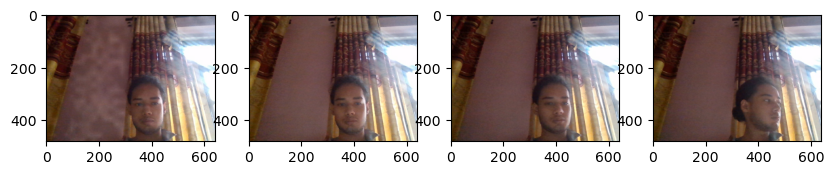

In [47]:
pics = img_gen.next()
fig, ax = plt.subplots( ncols=4 , figsize=(10,10))
for i, j in enumerate(pics):
    ax[i].imshow(j)
plt.show()


In [54]:
# for file in os.listdir(os.path.join('data', 'train', 'images')):
#     img_filename = file.split('.')[0]
#     filename = file.split('.')[0] + '.json'
#     filepath = os.path.join('data','train', 'label', filename)
#     if os.path.exists(filepath):
#         new_path = os.path.join('data', 'train', 'label', filename)
#         print(f'{new_path} exists')

#     else:
#         p = img_filename + '.jpg'
#         p2 = os.path.join('data','train','images', p)
#         os.remove(p2)



data\train\label\1081ae60-1883-11ee-a732-d812654bd3c7.json exists
data\train\label\1124ea98-1883-11ee-be0c-d812654bd3c7.json exists
data\train\label\11753f58-1883-11ee-b8fd-d812654bd3c7.json exists
data\train\label\12147e86-1883-11ee-bd47-d812654bd3c7.json exists
data\train\label\12652368-1883-11ee-a3b6-d812654bd3c7.json exists
data\train\label\1306a870-1883-11ee-a609-d812654bd3c7.json exists
data\train\label\13559e1c-1883-11ee-a396-d812654bd3c7.json exists
data\train\label\1443dbaf-1883-11ee-951b-d812654bd3c7.json exists
data\train\label\14928aa9-1883-11ee-b925-d812654bd3c7.json exists
data\train\label\15347439-1883-11ee-aea4-d812654bd3c7.json exists
data\train\label\158322a6-1883-11ee-9157-d812654bd3c7.json exists
data\train\label\1625101b-1883-11ee-9f74-d812654bd3c7.json exists
data\train\label\1677800c-1883-11ee-9a89-d812654bd3c7.json exists
data\train\label\16c864ee-1883-11ee-8726-d812654bd3c7.json exists
data\train\label\1719aaff-1883-11ee-bbac-d812654bd3c7.json exists
data\train

In [7]:
# Image augmentation

import albumentations as alb


In [8]:
augmentor = alb.Compose(
    [alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format='albumentations',
                              label_fields=['class_labels'])
                    
)

In [11]:
imgg = cv2.imread(os.path.join('data','train','images','1081ae60-1883-11ee-a732-d812654bd3c7.jpg'))

In [12]:
imgg.shape

(480, 640, 3)

In [13]:
with open(os.path.join('data', 'train', 'label' , '1081ae60-1883-11ee-a732-d812654bd3c7.json'), 'r') as f:
    label =json.load(f)

In [15]:
label['shapes'][0]['points']

[[285.16853932584274, 241.12359550561797],
 [478.42696629213486, 443.37078651685397]]

In [16]:
coords =[0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [17]:
coords = list(np.divide(coords,[640, 480,640, 480]))

In [18]:
coords

[0.4455758426966293,
 0.5023408239700374,
 0.7475421348314607,
 0.9236891385767791]

In [19]:
aug_img = augmentor(image=imgg, bboxes=[coords], class_labels=['face'])

In [20]:
aug_img['image'].shape

(450, 450, 3)

In [21]:
aug_img['bboxes']

[(0.12349563046192258,
  0.5247191011235955,
  0.5529588014981273,
  0.9741573033707865)]

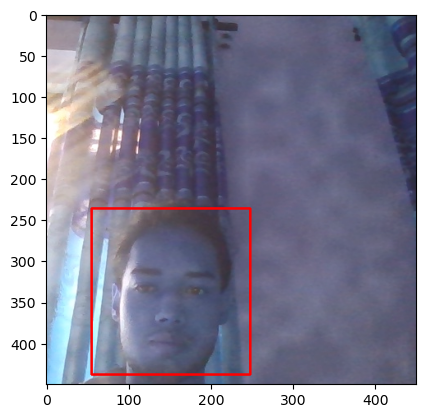

In [22]:
cv2.rectangle(
aug_img['image'],
tuple(np.multiply(aug_img['bboxes'][0][:2],[450, 450]).astype(int)),
tuple(np.multiply(aug_img['bboxes'][0][2:],[450, 450]).astype(int)),
(255, 0, 0), 2)

plt.imshow(aug_img['image'])

    

In [126]:
for folder in ['train', 'test', 'val']:
    for img in os.listdir(os.path.join('data',folder, 'images')):
        imgFile = cv2.imread(os.path.join('data',folder,'images', img))
        
        coords = [0,0,0.00001, 0.000001]
        
        label_path = os.path.join('data', folder, 'label', f'{img.split(".")[0]}.json')
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            
            coords = list(np.divide(coords,[640, 480,640, 480]))
        try:
            for x in range(60):
                augmented_imgs = augmentor(image=imgFile, bboxes = [coords], class_labels=['face'])
                
                cv2.imwrite(os.path.join('aug_images', folder, 'images', f'{img.split(".")[0]}.{x}.jpg'), augmented_imgs['image'])
                
                annotation = {}
                
                annotation['image'] = img
                
                if os.path.exists(label_path):
                    if len(augmented_imgs['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented_imgs['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                    
                with open(os.path.join('aug_images', folder, 'label', f'{img.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
            print(e)
                    
                    
                
                    
                
                
        
        
        
        

In [2]:
def load_img(path):
    img_file = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img_file)
    return img

In [3]:
train_images = tf.data.Dataset.list_files('aug_images\\train\\images\\*.jpg', shuffle=False)


In [4]:
train_images=train_images.map(load_img)

In [5]:
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))

In [6]:
train_images = train_images.map(lambda x: x/255)

In [7]:
val_images = tf.data.Dataset.list_files('aug_images\\val\\images\\*.jpg', shuffle=False)
val_images=val_images.map(load_img)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))

In [8]:
test_images = tf.data.Dataset.list_files('aug_images\\test\\images\\*.jpg', shuffle=False)
test_images=test_images.map(load_img)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))

In [9]:
train_images.as_numpy_iterator().next()

array([[[0.95349264, 0.9530637 , 0.91286767],
        [0.7384804 , 0.688174  , 0.60398287],
        [0.7766544 , 0.6856618 , 0.49693626],
        ...,
        [0.3485294 , 0.24558823, 0.22107843],
        [0.33609068, 0.22383578, 0.20324755],
        [0.33382353, 0.22303921, 0.19313726]],

       [[0.95980394, 0.9602941 , 0.92990196],
        [0.70134807, 0.6555147 , 0.5905637 ],
        [0.7432598 , 0.65067405, 0.5070466 ],
        ...,
        [0.35202205, 0.259375  , 0.25104168],
        [0.33137256, 0.2372549 , 0.22169118],
        [0.33903188, 0.24705882, 0.22708334]],

       [[0.8693015 , 0.88645834, 0.8685049 ],
        [0.69393384, 0.67536765, 0.63756126],
        [0.7485907 , 0.66384804, 0.5745711 ],
        ...,
        [0.36764705, 0.2735294 , 0.25784314],
        [0.36764705, 0.27009803, 0.25441176],
        [0.36844364, 0.2704044 , 0.25079656]],

       ...,

       [[0.5897059 , 0.597549  , 0.67990196],
        [0.56715685, 0.575     , 0.6573529 ],
        [0.5480392 , 0

In [10]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
              label = json.load(f)
    return [label['class']], label['bbox']

In [11]:
train_labels = tf.data.Dataset.list_files('aug_images/train/label/*.json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'aug_images\\train\\label\\1081ae60-1883-11ee-a732-d812654bd3c7.0.json'

In [12]:
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [13]:
train_labels

<_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

In [14]:
test_labels = tf.data.Dataset.list_files('aug_images/test/label/*.json', shuffle=False)
test_labels.as_numpy_iterator().next()

b'aug_images\\test\\label\\10d4b068-1883-11ee-97d0-d812654bd3c7.0.json'

In [15]:
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels

<_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

In [16]:
val_labels = tf.data.Dataset.list_files('aug_images/val/label/*.json', shuffle=False)
val_labels.as_numpy_iterator().next()

b'aug_images\\val\\label\\12b694ef-1883-11ee-aa13-d812654bd3c7.0.json'

In [17]:
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels

<_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

In [18]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2856, 0.0725, 0.7153, 0.522 ], dtype=float16))

In [19]:
len(train_images), len(train_labels)

(3540, 3540)

In [20]:
len(test_images), len(test_labels)

(900, 900)

In [21]:
len(val_images), len(val_labels)

(900, 900)

In [22]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [23]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [24]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [25]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [26]:
samples = train.as_numpy_iterator()

In [27]:
ds = samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


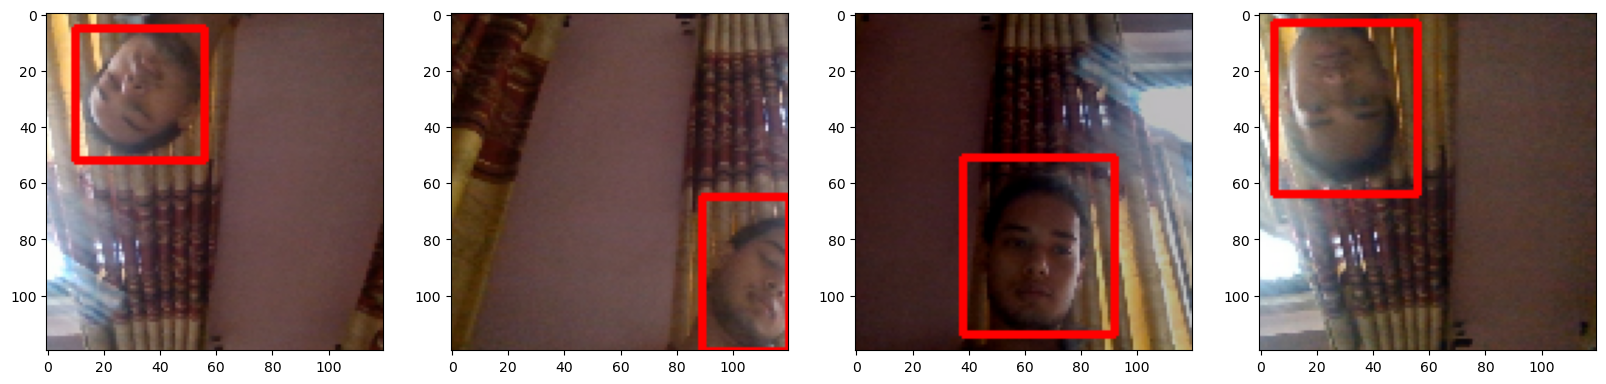

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4):
    ds_img = ds[0][idx]
    ds_coords = ds[1][1][idx]
    
    cv2.rectangle(ds_img, 
                  tuple(np.multiply(ds_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(ds_coords[2:], [120,120]).astype(int)),
                  
                  (255, 0, 0), 2)
    ax[idx].imshow(ds_img)     
                 

In [32]:
vgg16 = tf.keras.applications.VGG16(include_top = False)

In [33]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [34]:
inputt = tf.keras.layers.Input(shape=(120,120,3))

vgg = tf.keras.applications.VGG16(include_top=False)(inputt)

f1 = tf.keras.layers.GlobalMaxPooling2D()(vgg)
class1 = tf.keras.layers.Dense(2048, activation='relu')(f1)
class2 = tf.keras.layers.Dense(1, activation='sigmoid')(class1)

f2 = tf.keras.layers.GlobalMaxPooling2D()(vgg)
regress1 = tf.keras.layers.Dense(2048, activation='relu')(f2)
regress2 = tf.keras.layers.Dense(4, activation= 'sigmoid')(regress1)

detect_face = tf.keras.models.Model(inputs=inputt, outputs=[class2, regress2])


In [35]:
detect_face.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_5[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [36]:
x, y = train.as_numpy_iterator().next()

In [37]:
x.shape, y

((8, 120, 120, 3),
 (array([[1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1]], dtype=uint8),
  array([[0.485   , 0.4907  , 0.8545  , 0.9204  ],
         [0.5215  , 0.5083  , 0.9634  , 0.898   ],
         [0.      , 0.010635, 0.362   , 0.3752  ],
         [0.08716 , 0.45    , 0.5215  , 0.9746  ],
         [0.1686  , 0.0384  , 0.5903  , 0.568   ],
         [0.237   , 0.488   , 0.584   , 0.9375  ],
         [0.4385  , 0.5576  , 0.863   , 0.9546  ],
         [0.3599  , 0.01613 , 0.732   , 0.4531  ]], dtype=float16)))

In [38]:
len(train)

443

In [39]:
batches_per_epoch = len(train)

In [40]:
lr_decay = (1./0.75 -1)/batches_per_epoch

In [41]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decay)

In [42]:
opt = tf.keras.optimizers.Adam()

In [43]:
def localization_loss(y_true, y_pred):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - y_pred[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:,2] - y_true[:, 0]
    
    h_pred = y_pred[:, 3] - y_pred[:, 1]
    w_pred = y_pred[:,2] - y_pred[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size
    
    

In [44]:
class_loss = tf.keras.losses.BinaryCrossentropy()
regression_loss = localization_loss

In [45]:
class DetectFace(tf.keras.models.Model):
    def __init__(self, detect_face, **kwargs):
        super().__init__(**kwargs)
        self.model = detect_face
    def compile(self, opt, classification_loss, coord_loss, **kwargs):
        super().compile(**kwargs)
        self.class_loss = classification_loss
        self.coord_loss = localization_loss
        self.opt = opt
    
    def train_step(self, batch, **kwargs):
        x,y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(x, training = True)
            batch_class_loss = self.class_loss(y[0], classes)
            batch_coord_loss = self.coord_loss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_class_loss * 0.5 + batch_coord_loss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
            
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return{"total_loss":total_loss, "classification_loss": batch_class_loss, "regression_loss": batch_coord_loss}
    
    def test_step(self, batch, **kwargs):
        x,y = batch
        
      
        classes, coords = self.model(x, training = False)
        batch_class_loss = self.class_loss(y[0], classes)
        batch_coord_loss = self.coord_loss(tf.cast(y[1], tf.float32), coords)
            
        total_loss = batch_class_loss * 0.5 + batch_coord_loss
            
        return{"total_loss":total_loss, "classification_loss": batch_class_loss, "regression_loss": batch_coord_loss}
    def call(self, x, **kwargs):
        return self.model(x, **kwargs)

In [46]:
model = DetectFace(detect_face)

In [48]:
model.compile(opt, class_loss, regression_loss)

In [ ]:
# history = model.fit(train, epochs=10, validation_data = val)

Epoch 1/10


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
import cv2
import uuid
import json
detect_face = tf.keras.models.load_model("C:/Users/DELL/Downloads/detect_face_1.h5")

In [ ]:
capture = cv2.VideoCapture(0)
while capture.isOpened():
    _ , frame = capture.read()
    
    #rescaling the frame 
    frame = frame[50:500, 50:500, :]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    y_pred = detect_face.predict(np.expand_dims(resized/255, 0))
    f_coords = y_pred[1][0]
    if y_pred[0] > 0.5:
        # cv2.rectangle(frame,
        #              tuple(np.multiply(f_coords[:2], [450, 450]).astype(int)),
        #               tuple(np.multiply(f_coords[2:], [450,450]).astype(int)),
        #               (0,255,0), 1)
                      
        cv2.rectangle(frame,
                     tuple(np.add(np.multiply(f_coords[:2], [450,450]).astype(int), [0, 0])),
                      tuple(np.add(np.multiply(f_coords[:2], [450,450]).astype(int), [0, 0])),
                      (255,255,255), 1)
                      
        cv2.putText(frame, 'Face Tracked', tuple(np.add(np.multiply(f_coords[:2], [450,450]).astype(int),[0,-5])),
                    
                    cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow('Detect Face', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break;
                    

1/1 [==============================] - 0s 65ms/step


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - rectangle() missing required argument 'color' (pos 4)
>  - rectangle() missing required argument 'color' (pos 4)
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2
